In [1]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

%matplotlib inline

In [2]:
# create the LSH function
def lsh(s, b, r):
    x = math.pow(s, r)
    y = math.pow((1 - x), b)
    return 1 - y

In [3]:
# method to print the divisors 
def printDivisors(n) : 
    div_list = []
    div_list2 = []
    # Note that this loop runs till square root 
    i = 1
    while i <= n: 
          
        if (n % i == 0) : 
            div_list.append(i)
            div_list2.append(n / i)
        i = i + 1
        
    return div_list, div_list2

In [4]:
#create x values of the chart
x_vals = []
for i in range(101):
    x_vals.append(i / 100)

In [5]:
#create y values of the chart
def y_val(x_vals, b, r):
    y_vals = []
    for x in x_vals:
        y_vals.append(lsh(s=x, b=b, r=r))
    return y_vals

In [6]:
r_list, b_list = printDivisors(160)

In [7]:
plt.figure(figsize = (10,6))

for i in range(len(r_list)):
    y_val(x_vals, r_list[i], b_list[i])

<Figure size 720x432 with 0 Axes>

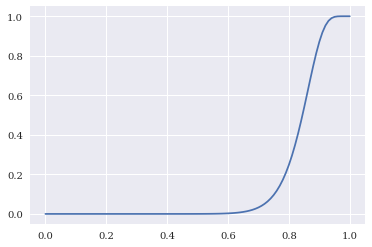

In [8]:
plt.plot(x_vals, y_val(x_vals = x_vals, b=10, r=16))

In [9]:
x_vals2 = [0.77, 0.25, 0.33, 0.20, 0.55, 0.91]
y_val(x_vals = x_vals2, b=10, r=16)

[0.14262712129925814,
 2.3283064365386963e-09,
 1.977985021328621e-07,
 6.553646514362299e-11,
 0.0007009160597826192,
 0.9178498654389164]

In [10]:
printDivisors(160)

([1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 80, 160],
 [160.0, 80.0, 40.0, 32.0, 20.0, 16.0, 10.0, 8.0, 5.0, 4.0, 2.0, 1.0])

In [11]:
lsh(0.85, 5, 32)

0.02726383383379194

In [12]:
lsh(0.85, 10, 16)

0.5376912520371375

In [13]:
# now to generate random unit vectors
import numpy

In [14]:
# method to generate a random unit vector of size d
def randomUnitVector(d):
    vec = []
    for element in range(d):
        vec.append(numpy.random.normal())
        
    result = 0
    for element in vec:
        result = result + (element * element)
    
    norm = math.sqrt(result)
    for i in range(len(vec)):
        vec[i] = vec[i] / norm
        
    return vec

In [15]:
# get the df of 160 random unit vectors of size 100
df = []
for t in range(160):
    df.append(randomUnitVector(100))

In [16]:
# helper method to compute dot products
def dotProduct(vec1, vec2):
    result = 0
    for i in range(len(vec1)):
        result += vec1[i] * vec2[i]
        
    return result

In [17]:
# now lets loop through our data structure
# calculating dot products
import itertools

In [18]:
# get a list of row pairs
t = []
for i in range(160):
    t.append(i)
    
rowPairs = list(itertools.combinations(t, 2))

In [19]:
# iterate through rowPairs computing dot products
dprods = []
for i in range(len(rowPairs)):
    dprods.append(dotProduct(df[rowPairs[i][0]], df[rowPairs[i][1]]))

In [86]:
# now defining some helper methods to convert a list to pdf to cdf and plot
from collections import Counter
import numpy as np
import pandas as pd

'''
This function takes a list of values and derives the PDF.
The PDF is then returned in a dictionary structure.
'''
def probabilityDensityFunction(arg_list):
    # convert list to dictionary
    # with keys being the list elements
    # and values being the count of element appearnces in list
    result_count = Counter(arg_list)
    
    # get the total number of observations
    total = sum(result_count.values(), 0.0)
    
    # divide each value in dictionary by total
    regularized_count = {k: v / total for k, v in result_count.items()}
    
    return regularized_count

'''
This function takes a PDF dictionary and returns
an ordered Pandas DataFrame with an additional 
column for cumulative probabilities.
'''
def cdfDataFrame(prob_dic):
    # converting the dicitonary to a 2 column numpy array
    df = np.array([[k,v] for k,v in prob_dic.items()])
    
    # sort the 2 column array for values in column 0
    df = df[df[:, 0].argsort()]
    
    # calculate the cumulative sum of the second column
    cdf = np.cumsum(df[:, 1])
    
    # now make a pandas dataframe
    data = pd.DataFrame({'Values': df[:, 0],
                         'Probability': df[:, 1],
                         'Cumulative Probability': cdf})
    
    return data

'''
This function plots the CDF DataFrame.
'''
def plotCDF(cdf_df, title):
    plt.figure(figsize = (10,10))
    
    # generate a plot
    plt.plot(cdf_df['Values'],
             cdf_df['Cumulative Probability'], 'r', lw=2.0)
    
    # grid lines on
    plt.grid(True)

    # adding some labels for clarity
    plt.xlabel("Values")
    plt.ylabel("Cumulative Frequency")
    plt.title(title)
    
    return

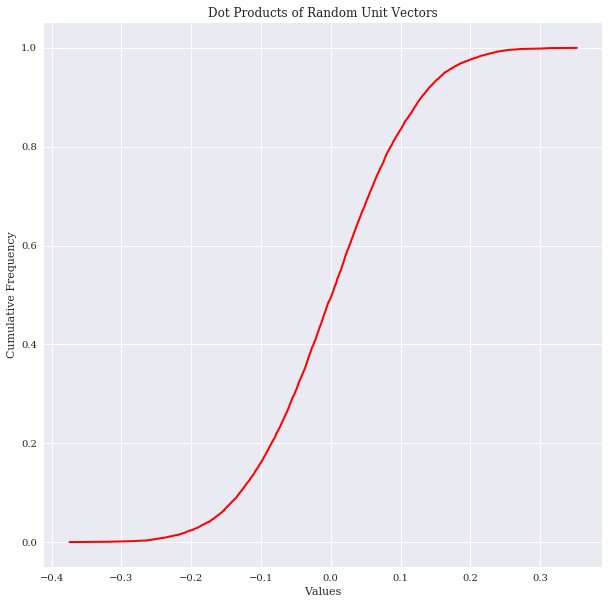

In [87]:
# generating the cdf plot from the list of d products
pdf = probabilityDensityFunction(dprods)
cdf_df = cdfDataFrame(pdf)

# view the data
plotCDF(cdf_df, "Dot Products of Random Unit Vectors")

In [22]:
import csv

In [24]:
R = numpy.loadtxt(open("R.csv", "rb"), delimiter= ",")

In [55]:
# helper method to check if the vector is a unit vector and convert it if not
def vecToUnitVec(vec):
    result = 0
    for element in vec:
        result += element * element
        
    norm = math.sqrt(result)
    if (abs(1.000000 - norm) > 0.000000000001):
        for i in range(len(vec)):
            vec[i] = vec[i] / norm
    
    return vec

In [30]:
# now we want to compute dot products for all row vecs in R
# we'll start by getting all combinations of row pairs
# get a list of row pairs
t = []
for i in range(len(R)):
    t.append(i)
    
rowPairs = list(itertools.combinations(t, 2))

In [56]:
# iterate through R and make unitvecs if necessary
Rc = R
for i in range(len(Rc)):
    Rc[i] = vecToUnitVec(Rc[i])

In [58]:
# computing all dot products
dprods2 = []

for i in range(len(rowPairs)):
    dprods2.append(dotProduct(Rc[rowPairs[i][0]], Rc[rowPairs[i][1]]))

In [73]:
# method to calculate angular similarity
def angSim(dprod):
    return 1 - ((1.0 / math.pi) * np.arccos(dprod))

In [83]:
# get list of all angular similarities
angSims = []
for i in range(len(dprods2)):
    angSims.append(angSim(dprods2[i]))

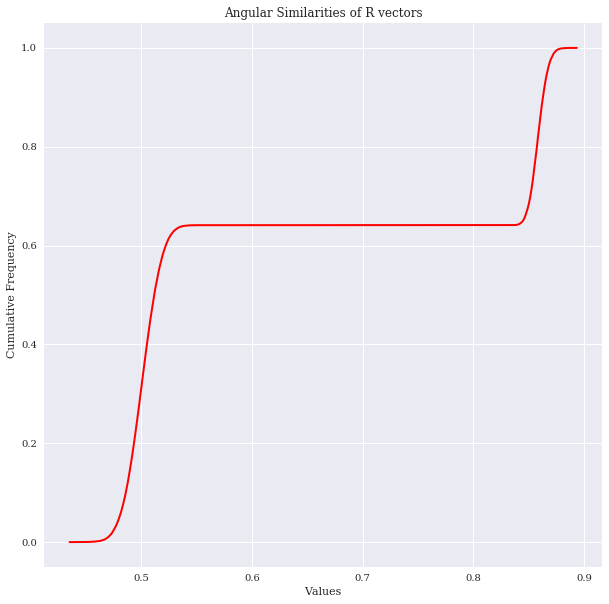

In [101]:
# generating the cdf plot from the list of angular similarities
pdf = probabilityDensityFunction(angSims)
cdf_df = cdfDataFrame(pdf)

# view the data
plotCDF(cdf_df, "Angular Similarities of R vectors")

In [92]:
# lets count the number with similarity greater than tao = 0.85
result = 0
for i in range(len(angSims)):
    if (angSims[i] >= 0.85):
        result += 1
print("Count of vectors with similarity greater than 0.85: ", result)

Count of vectors with similarity greater than 0.85:  39283


In [100]:
# get list of all angular similarities
angSims2 = []
for i in range(len(dprods)):
    angSims2.append(angSim(dprods[i]))

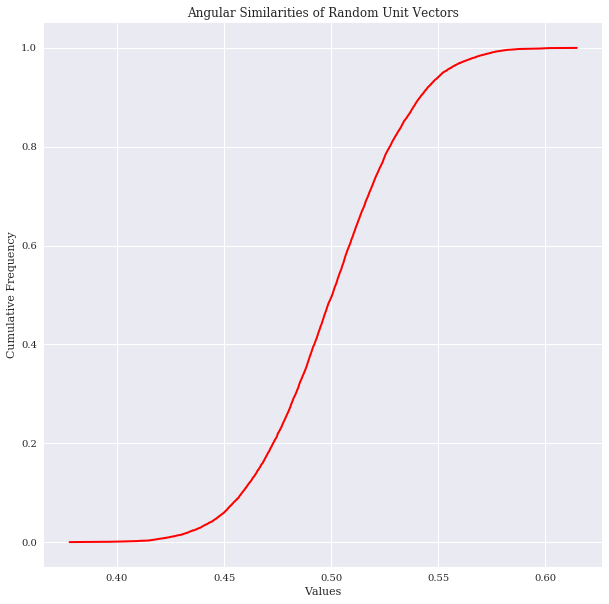

In [102]:
# generating the cdf plot from the list of angular similarities
pdf = probabilityDensityFunction(angSims2)
cdf_df = cdfDataFrame(pdf)

# view the data
plotCDF(cdf_df, "Angular Similarities of Random Unit Vectors")

In [103]:
# lets count the number with similarity greater than tao = 0.85
result = 0
for i in range(len(angSims2)):
    if (angSims2[i] >= 0.85):
        result += 1
print("Count of vectors with similarity greater than 0.85: ", result)

Count of vectors with similarity greater than 0.85:  0


In [104]:
angSims2

[0.49544906589672166,
 0.5166816100213847,
 0.4981520359444048,
 0.4672739897334425,
 0.48705110555067366,
 0.5420302844896131,
 0.49828870373707457,
 0.5286006879445666,
 0.47779561111237867,
 0.5211436014596922,
 0.5365266188583473,
 0.4890347042958505,
 0.5101453858015998,
 0.48394592296421834,
 0.5306419954775017,
 0.4775365304528606,
 0.43413973452113186,
 0.525754555826082,
 0.49916601463771626,
 0.4866468328062107,
 0.4539596822599956,
 0.48617324922216887,
 0.472011840898659,
 0.5079191529402518,
 0.4530428091113774,
 0.5091653478053375,
 0.46630967618706365,
 0.4458529342100609,
 0.4590036752412816,
 0.48328499356351007,
 0.5315565334380239,
 0.5045503222331904,
 0.5170044728594416,
 0.5136959067659839,
 0.4592635264236229,
 0.49566711861125257,
 0.5438708421721934,
 0.5223613363007842,
 0.5413067879019585,
 0.4980443440688267,
 0.46897037543484077,
 0.48867242402576305,
 0.5060830542682065,
 0.4539908207587765,
 0.49411918297528534,
 0.48623035100208956,
 0.5183670982370915,
